<a href="https://colab.research.google.com/github/dwarkeshsp/stock-market-volatility-analysis/blob/master/variation_in_stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Why does volatility in the stock market drive the median return down to 0 but keep the average return the same?

The stock market grows on average 10% percent a year. If the stock market grew exactly 10% percent every year for a century, your investment would increase 13781 fold.

But the stock market doesn't go up exactly 10% percent every year. Sometimes it's a little more, sometimes it's a little less (or as with the Coronavirus fallout right now, a lot less). 

What happens to our returns as this volatility increases? Let's run an experiment!

Let's test out different stock markets based on their volatility. So all the markets will grow a person's money on average 10% every year for a century. But what that return actually is for any given year will be randomly determined based on a normal distribution centered at 10% percent. Different markets will have a different standard deviation for this distribution. Let's test out every market that has a standard deviation of returns between 0% (you'll get 10% returns every year) to 35% (it'll be wild as shit). To get a useful sample size, in every markets we'll put 250000 investors, each of them with the starting amount of $1 and each getting a different random return every year for a century based on how volatile their stock market is.

Would the median investor make the same amount of money in long run across all these markets? Would the stock market as a whole rise the same?

The answer is very suprising.


In [0]:
import random
import numpy as np
import statistics
import matplotlib.pyplot as plt
from scipy.stats import skew as calc_skew
import seaborn as sns
from scipy.optimize import curve_fit
import pylab

In [0]:
def returns(starting_amount, avg_growth_rate, st_dev, time_horizon):
    returns = starting_amount
    growth_per_year = np.random.normal(avg_growth_rate, st_dev, time_horizon)
    for year in range(time_horizon):
        returns *= 1 + growth_per_year[year]
    return returns

In [0]:
def run_experiment(growth_rate, time_horizon, st_dev_range, ITERATIONS):
  mean, median, skew = [], [], []
  for st_dev in st_dev_range:
    sample = []
    for i in range(ITERATIONS):
      sample.append(returns(1, growth_rate, st_dev, time_horizon))
    mean.append(statistics.mean(sample))
    median.append(statistics.median(sample)) 
    skew.append(calc_skew(sample))
  return mean, median, skew

In [0]:
upper_bound = 0.35
st_dev_range = np.linspace(0, upper_bound, int(upper_bound * 100) + 1)
mean, median, skew = run_experiment(growth_rate=0.1, time_horizon=100, st_dev_range=st_dev_range, ITERATIONS=250000)

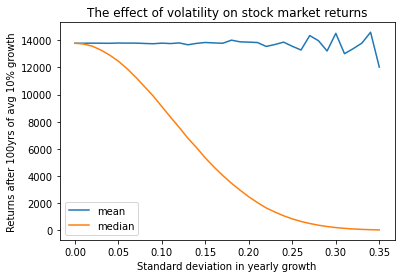

In [10]:
plt.plot(st_dev_range, mean, label='mean')
plt.plot(st_dev_range, median, label='median')
plt.title('The effect of volatility on stock market returns')
plt.legend(loc='lower left')
plt.xlabel('Standard deviation in yearly growth')
plt.ylabel('Returns after 100yrs of avg 10% growth')
# plt.show()
plt.savefig(fname='graph.png')

[-0.24342262 13.19684499]


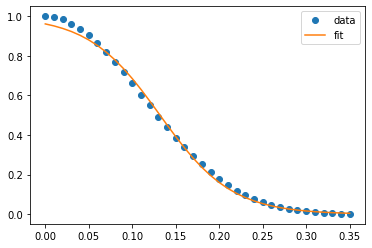

In [12]:
def sigmoid(x, a, b):
  return 1.0 / (1.0 + np.exp(-a*(x-b)))

xdata = [i * 100 for i in st_dev_range]
ydata = [i / median[0] for i in median]

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(popt)

y = sigmoid(xdata, *popt)

pylab.plot(st_dev_range, ydata, 'o', label='data')
pylab.plot(st_dev_range, y, label='fit')
pylab.legend(loc='best')
pylab.show()

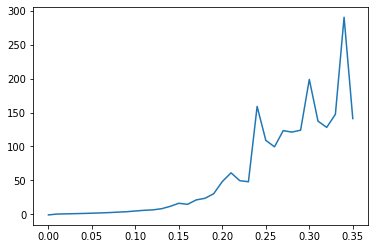

In [9]:
plt.plot(st_dev_range, skew)
plt.show()